# **The Cities of Tomorrow – Urban Growth & Sustainability**

This Notebook was created to explore how modern data science techniques can help us understand, evaluate, and predict the sustainability of future cities. Using a real-world–inspired dataset, we walk through a full end-to-end analysis: from data cleaning to predictive modeling.

# Objectives

By combining EDA, machine learning, and narrative-driven explanation, this Notebook demonstrates how data science can:

* Diagnose environmental challenges;
* Support sustainable development goals;
* Guide infrastructure investment;
* Anticipate risks and opportunities;
* Inspire smarter and more equitable urban growth.


# Setup Environment


In this Notebook, we will be using the following libraries:

*   [`kagglehub`](https://github.com/Kaggle/kagglehub) for interacting with Kaggle resources.
*   [`pandas`](https://pandas.pydata.org/) for managing the data.
*   [`numpy`](https://numpy.org/) for mathematical operations.
*   [`matplotlib`](https://matplotlib.org/) for data visualization.
*   [`seaborn`](https://seaborn.pydata.org/) for statistical data visualization.
*   [`scipy`](https://scipy.org/) for statistical operations.
*   [`sklearn`](https://scikit-learn.org/stable/) for predictive data analysis.


# Install Required Libraries

For this environment, `kagglehub` library requires installation.


In [ ]:
pip install kagglehub

### Importing Required Libraries

In [2]:
import kagglehub
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# 1. Data Loading, Cleaning & Preparation

The analysis begins by importing the dataset `urban_planning_dataset.csv`, followed by:

* Inspecting its structure, dimensions, and data types;
* Checking for missing values, duplicates, and anomalies;
* Identifying variable categories (numerical vs. categorical);
* Preparing the target variable: Urban Sustainability Score (0–1);
* Applying standard feature scaling for machine learning models;
* Ensuring reproducibility with consistent train/test splits.

This establishes a clean and reliable foundation for further analysis.

## Load Dataset

The following code is used to download the most recent CSV file to this environment, and import the file to a pandas dataframe.

In [3]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
#import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "urban_planning_dataset.csv"

# Load the latest version
df = kagglehub.dataset_load(
  KaggleDatasetAdapter.PANDAS,
  "programmer3/sustainable-urban-planning-and-landscape-dataset",
  file_path,
  # Provide any additional arguments like 
  # sql_query or pandas_kwargs. See the 
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

Print the first 5 entries of the dataset to confirm loading.


In [4]:
df.head(5)

,building_density,road_connectivity,public_transport_access,air_quality_index,green_cover_percentage,carbon_footprint,population_density,crime_rate,avg_income,renewable_energy_usage,disaster_risk_index,land_use_type_Commercial,land_use_type_Green Space,land_use_type_Industrial,land_use_type_Residential,urban_sustainability_score
0,0.367915,0.393821,0.428129,0.414830,0.238555,0.921950,0.126449,0.547160,0.932412,0.382358,0.446242,0.0,0.0,1.0,0.0,0.259239
1,0.414306,0.608445,0.658481,0.490982,0.917681,0.178213,0.325124,0.764042,0.903241,0.377167,0.936824,0.0,1.0,0.0,0.0,0.576923
2,0.827902,0.444679,0.263853,0.264529,0.077883,0.295159,0.042150,0.575736,0.208098,0.237949,0.463054,0.0,0.0,0.0,1.0,0.252844
3,0.733936,0.742708,0.012022,0.486974,0.427303,0.975900,0.663838,0.826727,0.258951,0.876539,0.204293,0.0,0.0,1.0,0.0,0.409002
4,0.769643,0.228268,0.519082,0.945892,0.532321,0.370856,0.429912,0.127542,0.180394,0.679006,0.151421,0.0,0.0,1.0,0.0,0.686376


## Data Cleaning and Preparation

Inspect basic structure and descriptive summary.

In [5]:
df.shape

(3476, 16)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3476 entries, 0 to 3475
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   building_density            3476 non-null   float64
 1   road_connectivity           3476 non-null   float64
 2   public_transport_access     3476 non-null   float64
 3   air_quality_index           3476 non-null   float64
 4   green_cover_percentage      3476 non-null   float64
 5   carbon_footprint            3476 non-null   float64
 6   population_density          3476 non-null   float64
 7   crime_rate                  3476 non-null   float64
 8   avg_income                  3476 non-null   float64
 9   renewable_energy_usage      3476 non-null   float64
 10  disaster_risk_index         3476 non-null   float64
 11  land_use_type_Commercial    3476 non-null   float64
 12  land_use_type_Green Space   3476 non-null   float64
 13  land_use_type_Industrial    3476 

In [7]:
# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f'Total duplicate rows: {duplicates}')

Total duplicate rows: 0


In [8]:
# Summary descriptive statistics
df.describe()

,building_density,road_connectivity,public_transport_access,air_quality_index,green_cover_percentage,carbon_footprint,population_density,crime_rate,avg_income,renewable_energy_usage,disaster_risk_index,land_use_type_Commercial,land_use_type_Green Space,land_use_type_Industrial,land_use_type_Residential,urban_sustainability_score
count,3476.000000,3476.000000,3476.000000,3476.000000,3476.000000,3476.000000,3476.000000,3476.000000,3476.000000,3476.000000,3476.000000,3476.000000,3476.000000,3476.000000,3476.000000,3476.000000
mean,0.496345,0.490205,0.501397,0.494445,0.505579,0.509657,0.502158,0.499659,0.491556,0.499881,0.494002,0.252301,0.246835,0.241945,0.258918,0.482871
std,0.287770,0.287484,0.287163,0.287185,0.288395,0.288139,0.286912,0.284553,0.285484,0.290146,0.287720,0.434396,0.431232,0.428323,0.438104,0.169391
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.249740,0.241686,0.256093,0.246493,0.256761,0.269287,0.254415,0.255697,0.242244,0.245107,0.243494,0.000000,0.000000,0.000000,0.000000,0.360202
50%,0.495439,0.483176,0.499168,0.488978,0.513606,0.507030,0.505622,0.499045,0.496457,0.498264,0.493688,0.000000,0.000000,0.000000,0.000000,0.482517
75%,0.745671,0.734190,0.752051,0.745491,0.757637,0.755210,0.750379,0.739293,0.730656,0.752263,0.739163,1.000000,0.000000,0.000000,1.000000,0.606625
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
# Convert data types for categorical columns
# List of land-use columns to convert
land_use_cols = [
    "land_use_type_Commercial",
    "land_use_type_Green Space",
    "land_use_type_Industrial",
    "land_use_type_Residential"
]

# Convert float to int
df[land_use_cols] = df[land_use_cols].astype(int)
df.dtypes

building_density              float64
road_connectivity             float64
public_transport_access       float64
air_quality_index             float64
green_cover_percentage        float64
carbon_footprint              float64
population_density            float64
crime_rate                    float64
avg_income                    float64
renewable_energy_usage        float64
disaster_risk_index           float64
land_use_type_Commercial        int64
land_use_type_Green Space       int64
land_use_type_Industrial        int64
land_use_type_Residential       int64
urban_sustainability_score    float64
dtype: object

In [10]:
# Compute correlation matrix
corr_matrix = df.corr()

corr_matrix

,building_density,road_connectivity,public_transport_access,air_quality_index,green_cover_percentage,carbon_footprint,population_density,crime_rate,avg_income,renewable_energy_usage,disaster_risk_index,land_use_type_Commercial,land_use_type_Green Space,land_use_type_Industrial,land_use_type_Residential,urban_sustainability_score
building_density,1.000000,-0.014771,0.017453,0.027841,-0.010515,-0.010294,-0.003227,0.003622,-0.006850,0.016142,0.002344,-0.006753,-0.003466,0.006644,0.003613,0.005958
road_connectivity,-0.014771,1.000000,0.016604,-0.007279,0.001629,-0.028132,-0.001075,-0.022773,-0.008395,-0.012200,-0.007070,0.020361,0.013564,-0.020785,-0.013219,0.016109
public_transport_access,0.017453,0.016604,1.000000,-0.010985,0.002725,0.043503,-0.016242,0.004606,0.005043,-0.008221,0.006086,0.008337,0.004500,0.006471,-0.019022,0.203036
air_quality_index,0.027841,-0.007279,-0.010985,1.000000,-0.010567,-0.014434,0.009704,-0.007388,-0.014050,0.017241,-0.041887,-0.024913,0.013642,0.003553,0.007801,0.018695
green_cover_percentage,-0.010515,0.001629,0.002725,-0.010567,1.000000,0.010713,-0.012843,0.012227,0.035667,0.040345,-0.021283,-0.028734,-0.003497,0.001798,0.030174,0.690025
carbon_footprint,-0.010294,-0.028132,0.043503,-0.014434,0.010713,1.000000,0.003770,0.020640,0.001274,-0.027000,0.008813,-0.013187,-0.006897,0.011767,0.008360,-0.337701
population_density,-0.003227,-0.001075,-0.016242,0.009704,-0.012843,0.003770,1.000000,0.010296,-0.004221,-0.008774,-0.006974,-0.025382,0.024575,-0.016651,0.017257,-0.017371
crime_rate,0.003622,-0.022773,0.004606,-0.007388,0.012227,0.020640,0.010296,1.000000,-0.001010,0.017237,-0.009200,0.004706,-0.015004,-0.000423,0.010517,-0.207367
avg_income,-0.006850,-0.008395,0.005043,-0.014050,0.035667,0.001274,-0.004221,-0.001010,1.000000,-0.020225,-0.006769,-0.014758,0.013694,-0.010038,0.010968,0.018001
renewable_energy_usage,0.016142,-0.012200,-0.008221,0.017241,0.040345,-0.027000,-0.008774,0.017237,-0.020225,1.000000,-0.003273,-0.014184,0.015591,-0.001499,0.000183,0.481232


### Conclusions

#### Dataset Overview:

* Dataset shape: 3476 rows, 16 columns;
* The columns are numeric; 
* No string columns were detected;
* No missing values;
* No duplicate rows were found;
* Categorical columns were found, updated data types.

#### Target detection:
The numeric column `urban_sustainability_score` is selected as the target.

## 2. Exploratory Data Analysis (EDA)

A combination of statistical summaries and visualizations is used to understand:

* Distribution shapes of key indicators;
* Correlations between features and urban sustainability outcomes;
* Relationships among environmental, socio-economic, and spatial attributes;
* Potential multicollinearity and feature clustering.

The EDA helps uncover meaningful patterns, such as which urban conditions contribute positively or negatively to sustainability.


### Distribution of Key Indicators

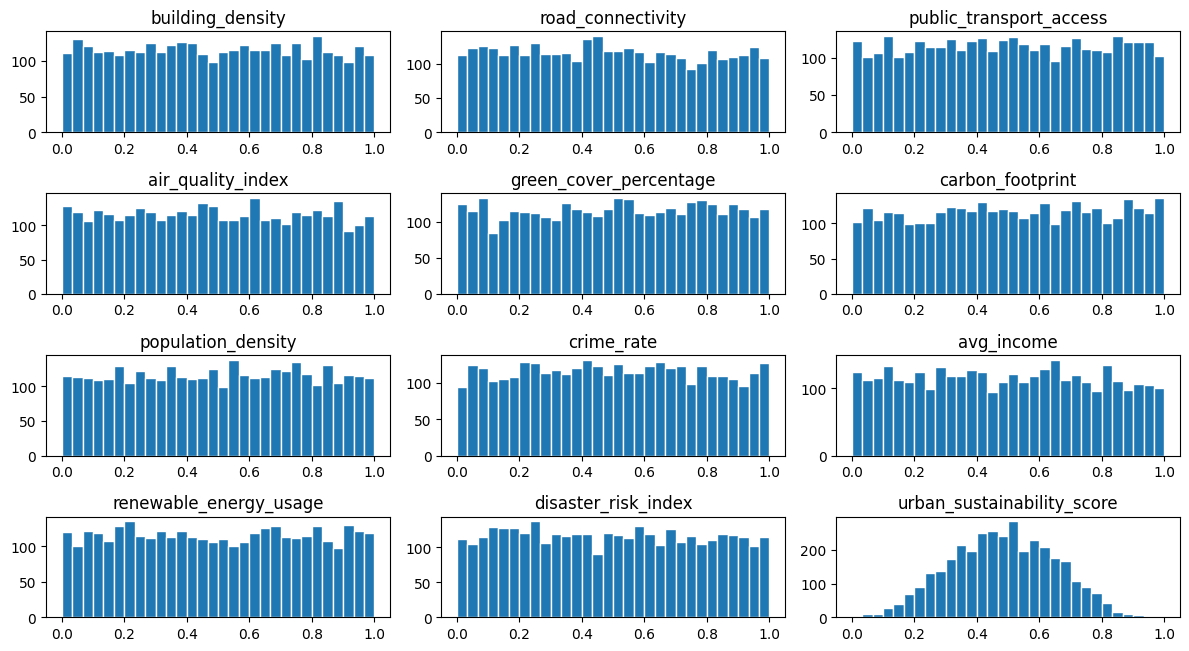

In [11]:
# Select numeric columns except categorical ones
numeric_cols = df.columns.tolist()
numeric_cols_filtered = [col for col in numeric_cols if col not in land_use_cols]

# Plot histograms for the filtered numeric columns
plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_cols_filtered, 1):
    plt.subplot((len(numeric_cols_filtered)//3)+1, 3, i)
    plt.hist(df[col], bins=30, edgecolor='white')
    plt.title(col)
    plt.tight_layout()

plt.show()

### Correlation Heatmap between All Features and Urban Sustainability Outcomes

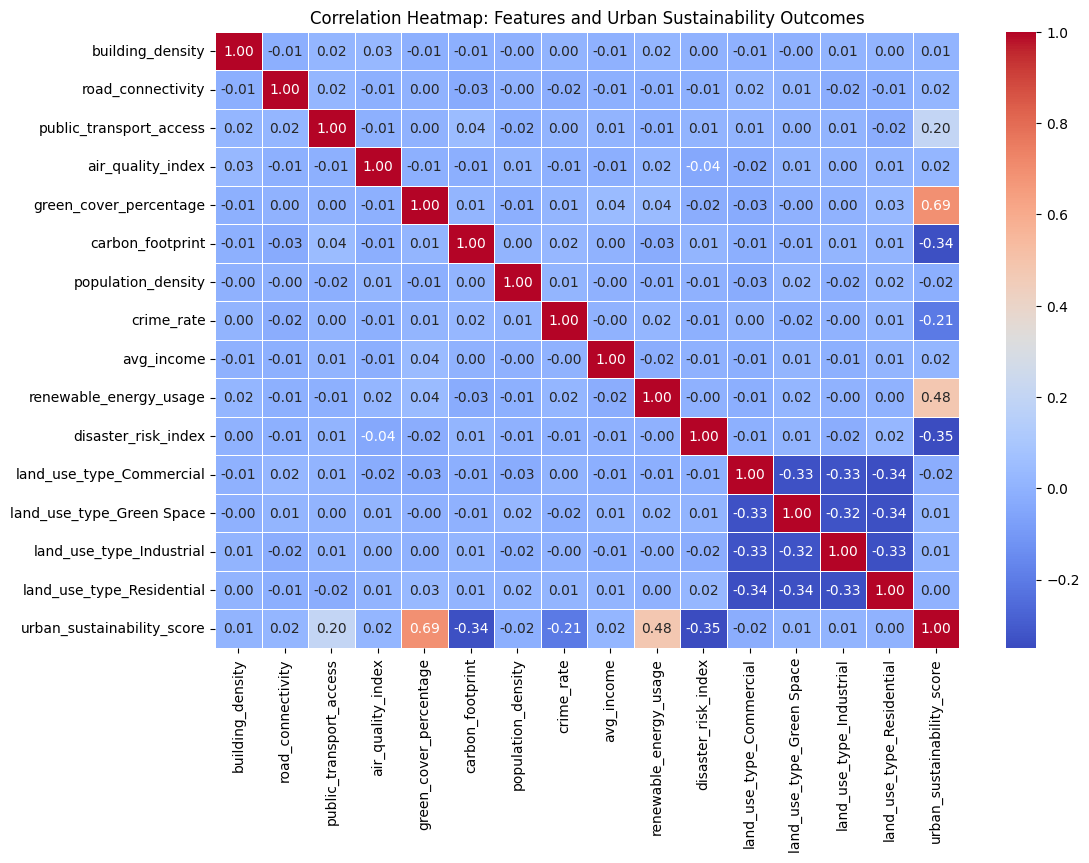

In [12]:
# Display the matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths='0.5')
plt.title('Correlation Heatmap: Features and Urban Sustainability Outcomes')
plt.show()

### Feature Correlation with Target only

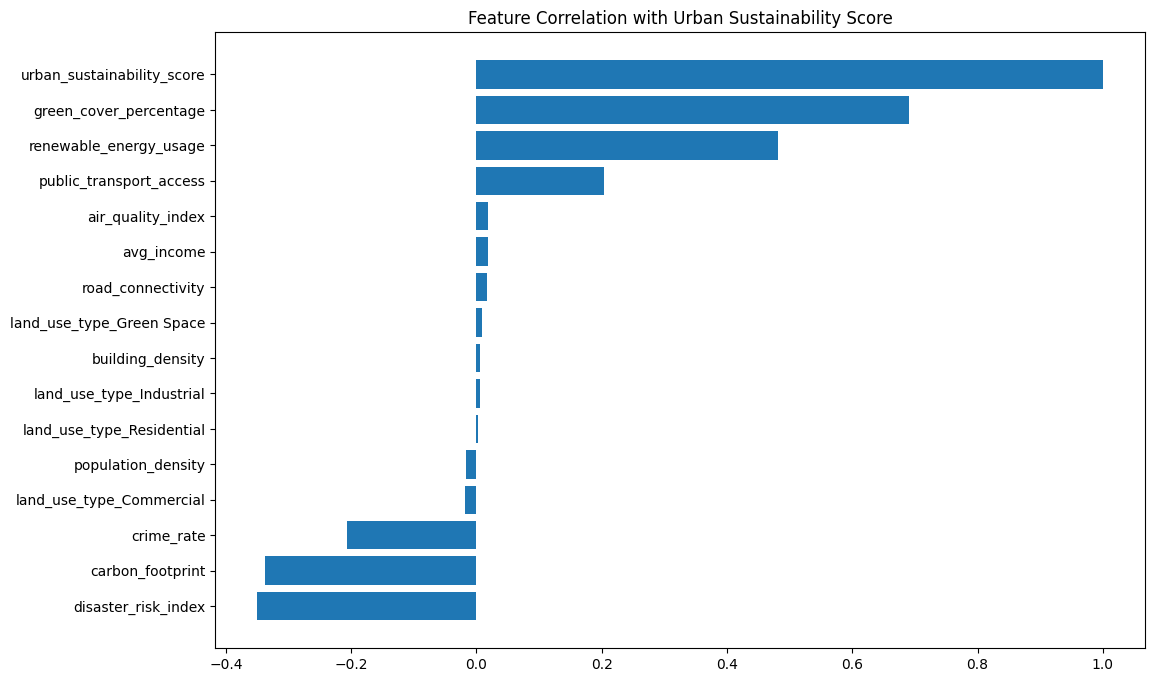

In [13]:
# Define target
target = "urban_sustainability_score"

# Calculate correlation with target
target_corr = corr_matrix[target].sort_values(ascending=False)
#print("\nCorrelation with Urban Sustainability Score:\n")
#print(target_corr)

plt.figure(figsize=(12, 8))
plt.barh(target_corr.index, target_corr.values)
plt.title("Feature Correlation with Urban Sustainability Score")
plt.gca().invert_yaxis()
plt.show()

### Pairwise Relationships (Top 5 Correlated Features)

<Figure size 1200x600 with 0 Axes>

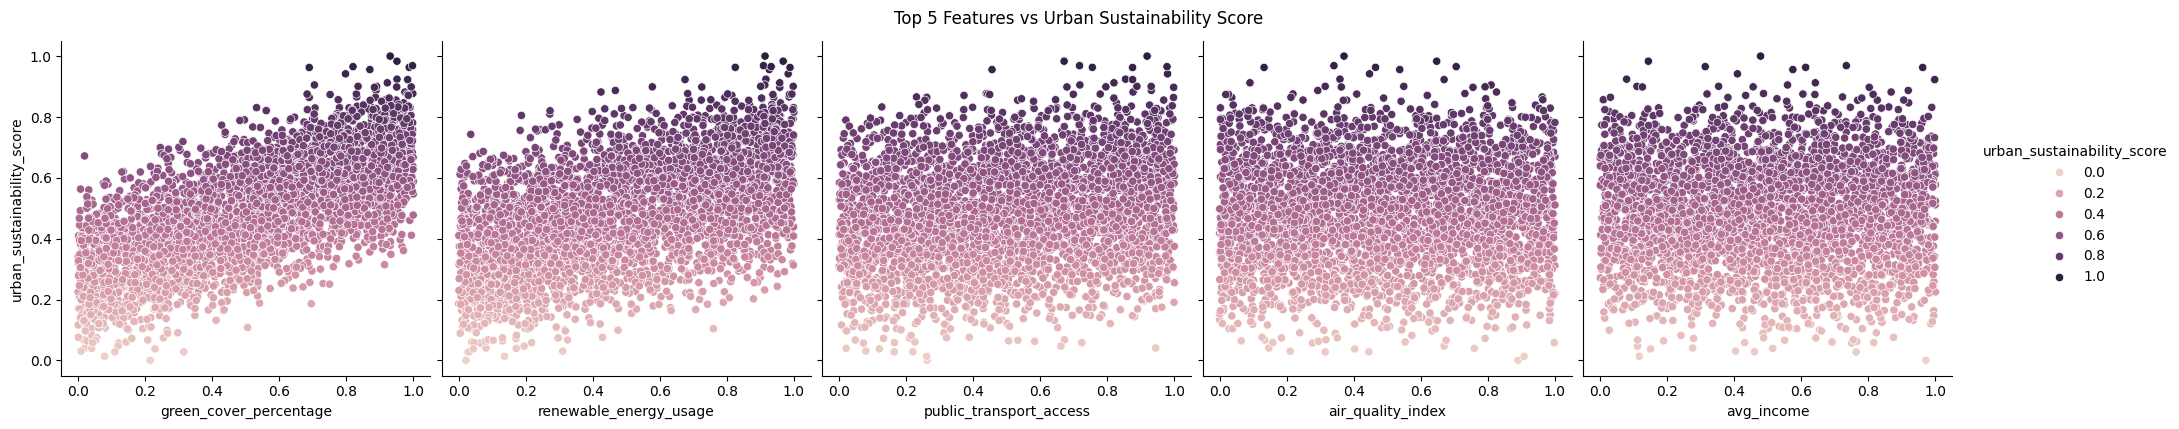

In [24]:
plt.figure(figsize=(12, 6))
sns.pairplot(df, x_vars=target_corr.index[1:6], y_vars=target, height=4, aspect=1, hue=target)
plt.suptitle("Top 5 Features vs Urban Sustainability Score", y=1.05)
plt.show()

All five features show a generally upward trend: as each feature increases, the `urban_sustainability_score` also increases.
This suggests that improvements in these factors are associated with more sustainable urban environments.

Among the five features, `green_cover_percentage` and `renewable_energy_usage` show the clearest and strongest positive patterns, suggesting they may be especially influential in determining sustainability outcomes.

<Figure size 1200x400 with 0 Axes>

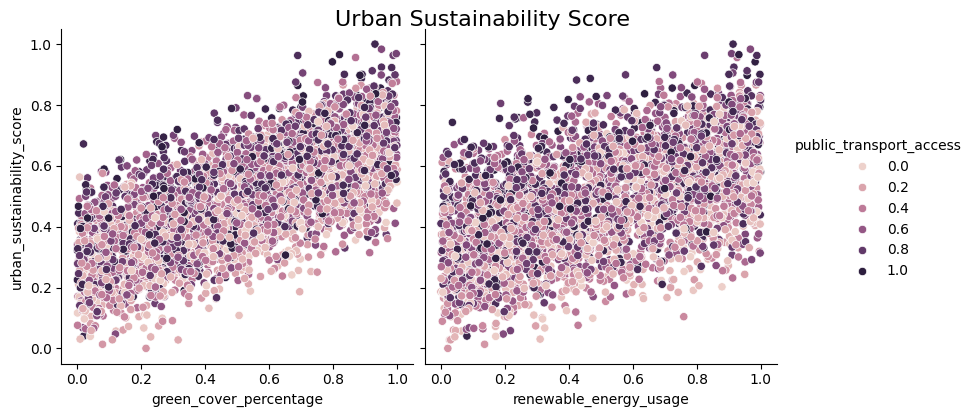

In [ ]:
plt.figure(figsize=(12, 4))
sns.pairplot(df, x_vars=target_corr.index[1:3], y_vars=target, height=4, aspect=1, hue="public_transport_access")
plt.suptitle("Urban Sustainability Score", y=1.05)
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

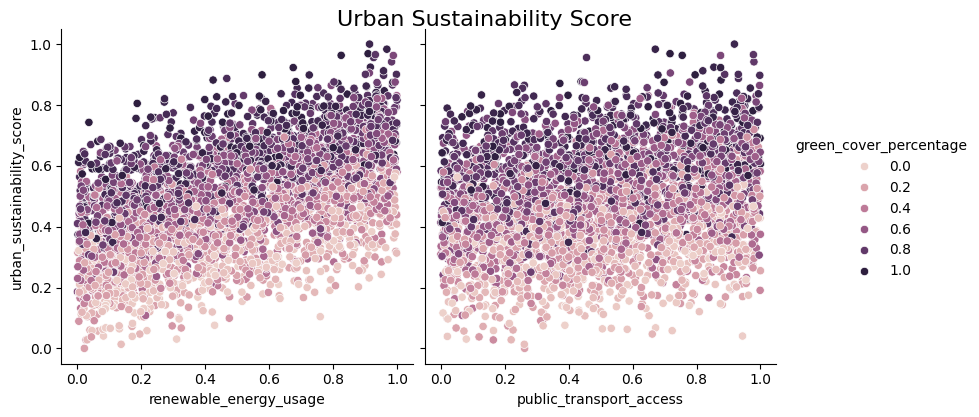

In [17]:
plt.figure(figsize=(12, 6))
sns.pairplot(df, x_vars=target_corr.index[2:4], y_vars=target, height=4, aspect=1, hue="green_cover_percentage")
plt.suptitle("Urban Sustainability Score", y=1.05)
plt.tight_layout()
plt.show()